In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from IPython.display import Image

In [28]:
# 2016 Encampment Geodata
la_df = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/MyLA311_Service_Request_Data_2016.csv')
encampment_df = la_df[la_df['RequestType'] == 'Homeless Encampment'].reset_index(drop = True)
encampment_df['Latitude'] = encampment_df.apply(lambda x: str(x.Location).strip('()').split(',')[0] if x.Location != np.nan else x.Location, axis = 1)
encampment_df['Longitude'] = encampment_df.apply(lambda x: str(x.Location).strip('()').split(',')[-1] if x.Location != np.nan else x.Location, axis = 1)
non_na_encampments = encampment_df[encampment_df['Latitude'] != 'nan']
# Convert to floats
non_na_encampments = non_na_encampments.astype({'Longitude': 'float', 'Latitude' : 'float'})
non_na_encampments = non_na_encampments[non_na_encampments['ApproximateAddress'] == 'N']

BBox = ((non_na_encampments.Longitude.min(), non_na_encampments.Longitude.max(),      
         non_na_encampments.Latitude.min(), non_na_encampments.Latitude.max()))

/Users/villalpando/Documents/Winter2021/DSTools/dst1_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [29]:
# 2020 Encampment Geodata
enc2020 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/MyLA311_Service_Request_Data_2020.csv')
enc2020 = enc2020[enc2020['RequestType'] == 'Homeless Encampment'].reset_index(drop = True)
enc2020['Latitude'] = enc2020.apply(lambda x: str(x.Location).strip('()').split(',')[0] if x.Location != np.nan else x.Location, axis = 1)
enc2020['Longitude'] = enc2020.apply(lambda x: str(x.Location).strip('()').split(',')[-1] if x.Location != np.nan else x.Location, axis = 1)
enc2020 = enc2020[enc2020['Latitude'] != 'nan']
# Convert to floats
enc2020 = enc2020.astype({'Longitude': 'float', 'Latitude' : 'float'})
enc2020 = enc2020[enc2020['ApproximateAddress'] == 'N']

BBox2 = ((enc2020.Longitude.min(), enc2020.Longitude.max(),      
         enc2020.Latitude.min(), enc2020.Latitude.max()))

/Users/villalpando/Documents/Winter2021/DSTools/dst1_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [30]:
count_07 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/2007-Table 1.csv')
count_08 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/2008-Table 1.csv')
count_09 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/2009-Table 1.csv')
count_10 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/2010-Table 1.csv')
count_11 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/2011-Table 1.csv')
count_12 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/2012-Table 1.csv')
count_13 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/2013-Table 1.csv')
count_14 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/2014-Table 1.csv')
count_15 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/2015-Table 1.csv')
count_16 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/2016-Table 1.csv')
count_17 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/2017-Table 1.csv')
count_18 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/2018-Table 1.csv')
count_19 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/2019-Table 1.csv')
count_dfs = [count_07, count_08, count_09, count_10, count_11, count_12, count_13, 
             count_14, count_15, count_16, count_17, count_18, count_19]
for df in count_dfs:
    # Adding a year column based on the value in column 3, which always shows the current year
    df['Year'] = df.columns[3][-4:]
    # Stripping the year appended to each column name that isn't in the below list
    df.rename(columns=lambda x: x[0:-6] if x not in ['CoC Number', 'CoC Name', 'Year'] else x, inplace=True)
    # Last 3 rows are 2 nans and aggregates for each sheet. Not needed
    df.drop(df.tail(3).index, 
        inplace = True)
    

count_df = pd.concat(count_dfs,join='inner', ignore_index=True)

# Change shelter number to just the state it's in

# Change type to int for most columns
count_df.replace(',','', regex=True, inplace=True)

for col in count_df.columns[2:]:
    count_df[col] = count_df[col].astype(int)
    
count_df['State'] = count_df['CoC Number'].apply(lambda x: x[:2] if type(x) != float and x[2] == '-' else x)

    
agg_df = count_df[['State', 'Overall Homeless', 'Year']].groupby(['State', 'Year']).agg('sum')
agg_df.reset_index(inplace = True)

In [31]:
pop_housing10 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/Population_Housing/E5CityCounty2010-Table 1.csv')
pop_housing11 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/Population_Housing/E5CityCounty2011-Table 1.csv')
pop_housing12 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/Population_Housing/E5CityCounty2012-Table 1.csv')
pop_housing13 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/Population_Housing/E5CityCounty2013-Table 1.csv')
pop_housing14 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/Population_Housing/E5CityCounty2014-Table 1.csv')
pop_housing15 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/Population_Housing/E5CityCounty2015-Table 1.csv')
pop_housing16 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/Population_Housing/E5CityCounty2016-Table 1.csv')
pop_housing17 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/Population_Housing/E5CityCounty2017-Table 1.csv')
pop_housing18 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/Population_Housing/E5CityCounty2018-Table 1.csv')
pop_housing19 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/Population_Housing/E5CityCounty2019-Table 1.csv')
pop_housing20 = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/Population_Housing/E5CityCounty2020-Table 1.csv')
pop_housing = [pop_housing10, pop_housing11, pop_housing12, pop_housing13, pop_housing14, pop_housing15, 
               pop_housing16, pop_housing17, pop_housing18, pop_housing19, pop_housing20]
year = 2010
for df in pop_housing:
    df.columns = df.iloc[1]
    df.drop(df.head(2).index, inplace=True)
    df.drop(df.tail(3).index, inplace=True)
    df['Year'] = year
    df['County'] = df['County'].apply(lambda x: x.strip())
    df['City'] = df['City'].apply(lambda x: x.strip())
    df['Population Total'] = pd.to_numeric(df['Total'].apply(lambda x: x.replace(',', '')))
    df['Housing Total'] = pd.to_numeric(df['Total2'].apply(lambda x: x.replace(',', '')))
    year += 1

pop_housing_df = pd.concat(pop_housing,join='inner', ignore_index=True)
pop_housing_df = pop_housing_df[~pop_housing_df.City.isin(['County Total', 'Balance Of County', 'Incorporated'])]
# pop_housing_df = pop_housing_df[pop_housing_df['County'] == 'Los Angeles']
pop_housing_df = pop_housing_df[['County', 'City', 'Population Total', 'Housing Total', 'Year']]
pop_agg = pop_housing_df.groupby(['Year']).agg('sum')
pop_agg['Persons per Household'] = pop_agg.apply(lambda x: round(x['Population Total']  / x['Housing Total'], 4), axis = 1)

ex_df = count_df[count_df['CoC Name'] == 'Los Angeles City & County CoC']
ex_df = ex_df[['CoC Name', 'Year', 'Overall Homeless']]
ex_df.columns = ['Continuum of Care Name', 'Year', 'Overall Homeless']

ladf = ex_df.merge(pop_agg, how='left', on='Year')

# Homelessness in LA

It's no secret that homelessness has far surpassed the criteria of being labeled a crisis in the United States. In my own hometown of Los Angeles, the crisis has never been more apparent than today. With homelessness reaching all time highs in 2020, local and federal governments have shifted a lot of focus towards understanding the issue at hand so that solutions can be found.

Frankly, this is not a simple issue at all. I have come to learn that issue seems to stem from *multiple* factors. Many postulate that the issue of homelessness is directly linked to issues of mental health, race, population growth, the job market and unemployment, the War on Drugs, crime, and housing development. Unfortunately, none of these issues are rarely presented without dogma that detracts away from understanding that a crisis with multiple contributing factors requires multiple solutions.

This project will largely focus on homelessness in the county of Los Angeles, but there will be some comparisons made to other counties in the nation when having a look at potential solutions. Because of the scope of factors contributing to the evergrowing crisis, it would be far too large of an undertaking to evaluate *all* of them. I will be primarily focusing on testing one hypotheses that piqued my interest: slow housing development relative to population growth. In order to test this hypotheses and provide adequate exploratory data analysis to demonstrate the severity of the crisis, this project will feature data spanning multiple sources.

# The Data

For all datasets, missing values were largely discarded. For one, there is some disparity in years covered between all doucments used. Additionally, for the location data pulled from MyLA311, null values are useless for plotting.

## The Department of Housing and Urban Development
The data related to homelessness available through city and federal governments is extensive, but much of its publicly available data is hard to find meaningful insight from in explaining demographic changes over the years. Seemingly, most resources spent on data collection related to homelessness simply involve *counts* of homeless people, with occasional categorization by factors such as race, gender, and age. The largest data collection related to homelessness is the country-wide "Point-in-Time count" (PIT) organized by the U.S. Department of Housing and Urban Development (HUD). This data collection is conducted by "Continuums of Care", which are district-wide bodies that, among other things, help homeless people transition towards permanent housing. The PIT count is largely done by volunteers–with Los Angeles boasting the largest effort in conducting the count. The data provided by these PIT counts will be used to show total numbers of homeless people from the years 2007-2020.

In addition to the PIT Count, each Continuum of Care in the nation is instructed by HUD to also gather extensive data on their inventory, as well as of conduct surveys on those who parttake in their services. With that data, they regularly issue reports on their findings. However, as useful as their reports are, the raw data–the surveys–is *not* available to the public. This significantly changes the level at which this project can evaluate outcomes as a result of policy or programs. Ideally, with access to this data, we could look at the effect local government solutions have at the individual level–a powerful capability. However, I will try to make due with higher level data from the countrywide census.

As for the inventory data they collect, it isn't particularly useful for the purposes in this project and will not be used, though knowledge of how their services are being used is incredibly important for the facilities themselves. They use this data to ensure their facilities are used to the highest capacity possible. For example, if occupancy of a CoC facility designed to be used by families is not at full capacity, but a woman's shelter is struggling to meet demand, said CoC facility will change its eligibility requirements to accomodate for other demographics.

Moreover, the focus of HUD's data collection is aimed more at serving those who are already experiencing homelessness, and doesn't provide much insight on *why* homeless demographics are everchanging.

## MyLA311 Data

Simply for visuals to demonstrate how dramaticically the homelessness crisis has changed over the years, I gathered geospatial data from the city's MyLA311 database. MyLA311 is a hotline for reporting non emergencies throughout Los Angeles, including, among other things: illegal dumping, graffiti, excessive trash, and homeless encampments. While *reported* homeless encampments aren't entirely indicative of the problem of homelessness, it is still the most tangible measure for residents of Los Angeles. As encampments increasingly canopy the overpasses of our ever-crowded freeways, and our sidewalks that rarely receive foot traffic anyway are now impassable because of tents, the issue has never been more plainly obvious and in the public's face. The city of Los Angeles cannot *physically* look the other way anymore–the issue is (almost) everywhere. As we'll see, there are some well-guarded nieghborhoods in Los Angeles that have managed to keep the issue in their peripherals (and their commonality will most definitely *not* be surprising).

Additionally, this data gives us an idea of how much the unsheltered homeless population has changed in a nice visual format.
Because 311 data includes *multiple* types of non-emergencies, the data used is filtered to only include incidents involving homeless encampments. Another caveat to this dataset is that it only includes data for issues within Los Angeles Proper (i.e. the city itself)–more on this below.

## US Census Data on Population and Housing Units

In order to gather insight on how housing affects homelessness, population and housing unit data from the 2010-2019 will be used. These tables will be joined, and then merged to a final dataset that includes homeless populations for each state. The purpose of this is to test how much available housing relative to population affects the homeless population, if at all. 


# Why LA?
First, let's have a look at the data and see some fairly obvious reasons why LA should be the focal point of the homelessness crisis in America.

California is currently the epicenter for homelessness in the United States (and territories). As of 2019, its homeless population totals 151,278–the largest homeless population in the United States. 

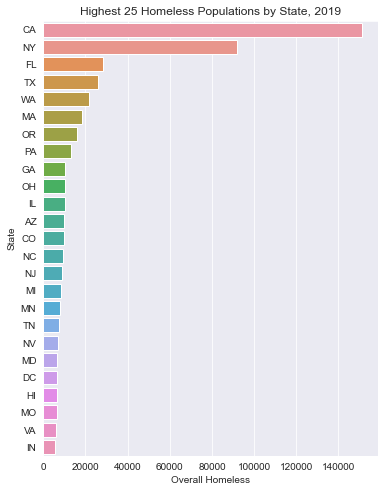

In [32]:
f, ax = plt.subplots(figsize=(6, 8))
homeless_19 = agg_df[agg_df['Year'] == 2019].sort_values(by = 'Overall Homeless', ascending = False).head(25)
ax.set(ylabel = "State", xlabel = "Overall Homeless Population", title = "Highest 25 Homeless Populations by State, 2019")
sns.barplot(data = homeless_19, x = "Overall Homeless", y = "State", orient = "h");

Here, we can see that California completely eclipses the homeless population of any other state. Additionally, the problem doesn't seem to be slowing down with upticks in recent years:

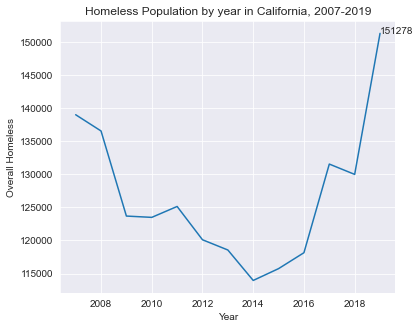

In [33]:
f, ax = plt.subplots(figsize=(6, 5))
sns.set_style('darkgrid')
plt.annotate(text='151278', xy=(2019, 151278), xycoords='data')
ax.set(title = "Homeless Population by year in California, 2007-2019")
sns.lineplot(data=agg_df[agg_df['State']=='CA'], x="Year", y="Overall Homeless");

To go one level deeper, of those 151,278 homeless people living in California, Los Angeles holds the highest proportion of that total with 56,257 homeless individuals as of 2019–an approximately 18% change since 2007.

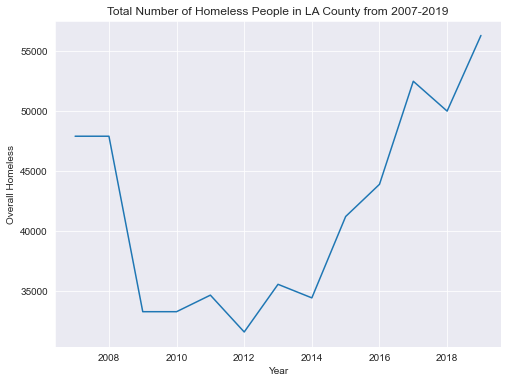

In [34]:
f, ax = plt.subplots(figsize=(8,6))
ax.set(title = "Total Number of Homeless People in LA County from 2007-2019")
sns.lineplot(data = ladf, x = "Year", y = "Overall Homeless");

## Mapped Data of Homeless Encampments
Using the data from MyLA311's non-emergency reports related to homeless encampments, the data shows that number of encampments and unsheltered subpopulation of homeless people is also increasing.

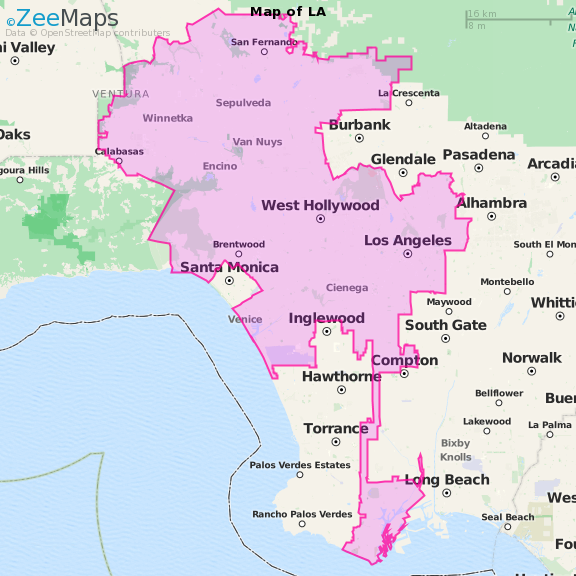

Above is a map of "Los Angeles Proper" (Courtesy of "ZeeMaps"), in other words, the city of Los Angeles itself. Because 311 only accounts for data within LA Proper, we can only plot coords for homeless encampments within those boundaries. Surely, though, the problem is much bigger than the data would suggest if we were to evaluate the county as a whole. Here, we can see the location of encampments for the year 2016: 

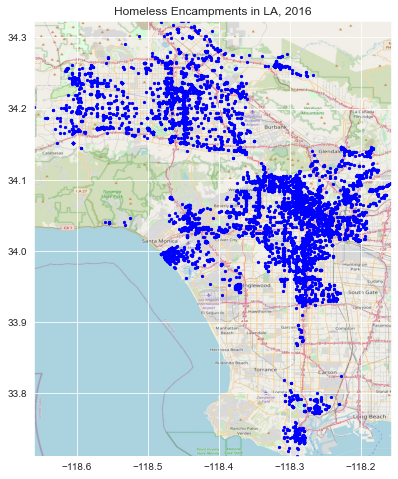

In [35]:
map_image = plt.imread('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/map.jpg')
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(non_na_encampments.Longitude, non_na_encampments.Latitude, zorder=1, c='b', s=5)
ax.set_title('Homeless Encampments in LA, 2016')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map_image, zorder=0, extent = BBox, aspect= 'equal');

As expected, for 2020 the crisis is only amplifying, with areas that were already populated with encampments becoming even more dense, and newer areas within the city becoming annexed. Curiously, Beverley Hills' borders seem to be well-protected as always–along with those of more affluent neighborhoods such as Larchmont and Brentwood.

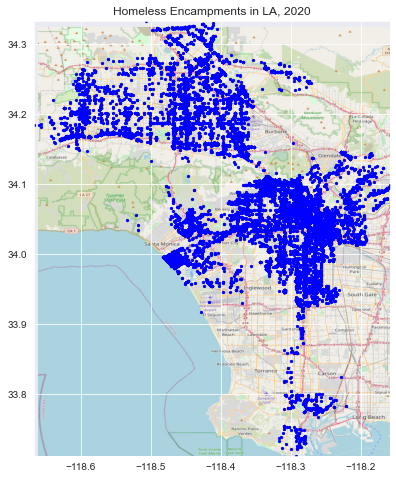

In [36]:
map_image2 = plt.imread('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/map.jpg')
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(enc2020.Longitude, enc2020.Latitude, zorder=1, c='b', s=5)
ax.set_title('Homeless Encampments in LA, 2020')
ax.set_xlim(BBox2[0],BBox2[1])
ax.set_ylim(BBox2[2],BBox2[3])
ax.imshow(map_image2, zorder=0, extent = BBox, aspect= 'equal');

# The Fight: Literature Review on How LA is Responding to the Crisis

Per Los Angeles Mayor Eric Garcetti's website, there's a very clear outline on what the city believes is the cause of homelessness as well as their solutions to them (full details here: https://www.lamayor.org/HomelessnessCausesAndResponses).
Of these causes and solutions, the city has adopted a "Housing First" approach to combatting homelessness and allocates a majority of its resources towards this. While I applaud the city's noble efforts with this approach, and would never argue against such housing assistance, I have my doubts that this is anything more than a band-aid. For one, it does not address the very causes outlined by the city. Additionally, a study by Cusack and Montgomery (2017) on Veterans who received housing assistance shows that recidivism (i.e. returning to homelessness) is highly probable even with housing assistance. Of course, this only speaks to a subset of the homeless population

Housing First is an approach that is often dogmatically prescribed as being a mutually exclusive solution with its supposed counterpart: Treatment First. In the Treatment First approach, individuals experiencing homelessness are provided with services that address issues that caused an individual to be homeless in the first place, such as drug or mental health treatment before receiving housing assistance. I find the juxtaposition between the two to be a bit overplayed, as research on the demographics of homelessness reveals that it is unfounded that homelessness is *primarily* an issue of mental health or drug usage. Like other factors, they're one small piece of the puzzle.

While the jury is still out on COVID-19's effect on the homeless population, Blasi (2020) purports that the effects will be *significantly* underplayed in the data-to-come because of the state's (noble) freezing of legal evictions for nonpayment since April 6, 2020. As Blasi points out, the Judicial Council or the Governor "can lift the freeze at any time." With record unemployment spikes due to the pandemic, 2021 is unlikely to look any better if and when the freeze is lifted.

# The Effect of Housing Development on Homelessness

In this section, I want to address perhaps the most important aspect of the city's attempt to address the housing issue. The Mayor has spearheaded a plan to accelerate the development of new housing in general–not just for those experiencing homelessness. To accomplish this task, I'll start with a precursory look at data for the City and County of Los Angeles. More specifically, I've created a feature in the data to show Persons per Household so that we can see the relationship between that metric and the Overall Homeless population.
Below, we can see that the total housing units from 2010-2019 in LA has increased by 573,391.

In [37]:
# Hiding rows with no data for population or housing
non_na_la = ladf[~ladf['Housing Total'].isna()]
# Used for getting the figure of 573,391:
# int(non_na_la[non_na_la['Year'] == 2019]['Housing Total']) - int(non_na_la[non_na_la['Year'] == 2010]['Housing Total'])
non_na_la

,Continuum of Care Name,Year,Overall Homeless,Population Total,Housing Total,Persons per Household
3,Los Angeles City & County CoC,2010,33243,30764188.0,11187787.0,2.7498
4,Los Angeles City & County CoC,2011,34622,31086714.0,11233387.0,2.7674
5,Los Angeles City & County CoC,2012,31553,31506091.0,11292199.0,2.7901
6,Los Angeles City & County CoC,2013,35524,31858521.0,11342703.0,2.8087
7,Los Angeles City & County CoC,2014,34393,32110077.0,11395169.0,2.8179
8,Los Angeles City & County CoC,2015,41174,32385073.0,11458347.0,2.8263
9,Los Angeles City & County CoC,2016,43854,32628187.0,11523164.0,2.8315
10,Los Angeles City & County CoC,2017,52442,32870570.0,11605749.0,2.8323
11,Los Angeles City & County CoC,2018,49955,33051381.0,11688063.0,2.8278
12,Los Angeles City & County CoC,2019,56257,33163325.0,11761178.0,2.8197


This is an admittedly incredibly small sample size. The amount of housing created has far surpassed Eric Garetti's goals for housing development, but I'm not entirely sure it paints the whole picture due to the small sample size. The Persons per Household ratio in Los Angeles is 2.8197 as of 2019, which surpasses that of the nation as a whole at 2.62. As we can see below, even such minor increments in the ratio of Persons per Household (Housing Total / Population Total) seems to hold as a strong predictor of the Overall Homeless population.

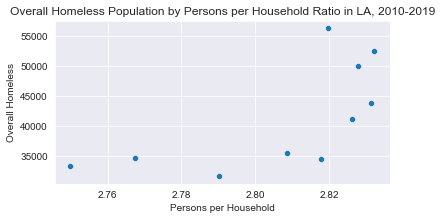

In [38]:
f, ax = plt.subplots(figsize=(6,3))
ax.set(title = "Overall Homeless Population by Persons per Household Ratio in LA, 2010-2019")
sns.scatterplot(data=non_na_la, x="Persons per Household", y="Overall Homeless");

My findings here are not meant to discredit the acceleration of housing creation, but clearly, it hasn't been enough. Perhaps we are still playing catch-up in keeping up with the nationwide average, as population growth still outweighs the city's ability to create new housing. Let's examing the same data, but nation-wide. To accomplish this, I will first create a table by joining data from the table agg_df to a newly created table from Census data that includes the population and housing unit counts for each state, for each year. Here is how the agg_df table looks like, which we'll be appending data to:

In [39]:
agg_df.sample(5)

,State,Year,Overall Homeless
150,GU,2014,1356
127,FL,2017,32190
18,AL,2012,5209
693,WY,2008,751
465,NY,2014,80590


In [40]:
# Create the Census Housing Unit DF to merge with Homeless data and Population
census_housing = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/Population_Housing/CensusHousing.csv')
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
# census_housing
census_housing.columns = census_housing.iloc[0]
census_housing.drop(census_housing.head(1).index, 
        inplace = True)
census_housing = census_housing[['State', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
census_housing = census_housing.melt(id_vars=["State"], 
        var_name="Year", 
        value_name="Housing Units")

# Get rid of the random period before the state, then convert it to the abbreviation of the state for easy joining of tabkes
census_housing['State'] = census_housing.apply(lambda x: us_state_abbrev[x.State.replace('.', '')], axis = 1)
# Convert Population to an integer, strip the ','
census_housing['Housing Units'] = census_housing.apply(lambda x: int(x['Housing Units'].replace(',', '')), axis = 1)
# Convert year to int
census_housing['Year'] = census_housing['Year'].astype(int)

# Merge the Census Housing table to the homeless population data in agg_df
nation_df = agg_df.merge(census_housing, left_on=['State', 'Year'], right_on=['State', 'Year'])

In [41]:
# Create the population table
census_population = pd.read_csv('/Users/villalpando/Documents/Winter2021/DSTools/Homeless/Population_Housing/CensusPopulation.csv')
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# Simultaneously change the district name to just the state it's in, for an aggregated df later, as well as the column name to 'State'
census_population['State'] = census_population['Geographic Area'].apply(lambda x : us_state_abbrev[x.split(',')[1].strip()])
# Get rid of unnecessary columns
census_population = census_population.drop(['Geographic Area', 'Census', 'Estimates Base'], axis=1)
# Melt to long format
census_population = census_population.melt(id_vars=['State'], 
        var_name="Year", 
        value_name="Population")

#Change Population to int
census_population['Population'] = census_population.apply(lambda x: int(x.Population.replace(',', '')), axis = 1)
# Convert year to int
census_population['Year'] = census_population['Year'].astype(int)

# Create the aggregated frame grouped by State and Year
census_pop_agg = census_population.groupby(['State', 'Year']).agg('sum')
census_pop_agg.reset_index(inplace = True)

In [42]:
# Finally, merge all three
nation_df = nation_df.merge(census_pop_agg, left_on=['State', 'Year'], right_on=['State', 'Year'])
nation_df['Persons per Household'] = nation_df.apply(lambda x: round((x['Population']  / x['Housing Units']) * 100, 4), axis = 1)
nation_df['Percent Homeless'] = nation_df.apply(lambda x: x['Overall Homeless'] / x['Population'], axis = 1)

Finally, after a lot of data cleaning and merging of tables, here is the final table which will be used to create another plot showing the relationship of Persons per Household and Homeless Populations and its corresponding plot. In order to show a more honest representation of the data, another feature has been created: "Percent Homeless", which shows the proportion of homeless people to the State's population as a whole

In [43]:
nation_df

,State,Year,Overall Homeless,Housing Units,Population,Persons per Household,Percent Homeless
0,AK,2010,1863,307181,713910,232.4070,0.002610
1,AK,2011,2128,308498,722128,234.0787,0.002947
2,AK,2012,1913,310002,730443,235.6253,0.002619
3,AK,2013,1946,311243,737068,236.8143,0.002640
4,AK,2014,1784,312396,736283,235.6890,0.002423
...,...,...,...,...,...,...,...
505,WY,2015,798,273221,585613,214.3367,0.001363
506,WY,2016,857,275045,584215,212.4071,0.001467
507,WY,2017,873,276708,578931,209.2209,0.001508
508,WY,2018,639,278568,577601,207.3465,0.001106


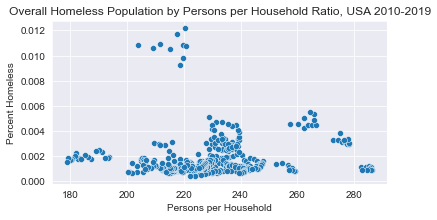

In [44]:
f, ax = plt.subplots(figsize=(6,3))
ax.set(title = "Overall Homeless Population by Persons per Household Ratio, USA 2010-2019")
sns.scatterplot(data=nation_df, x="Persons per Household", y="Percent Homeless");

There is *some* semblance of a linear relation between the two variables, however, the relation is muddled by the outliers towards the top of the plot. With some filtering of the table, we can find out which State accounts for those outliers: Washington D.C.

In [45]:
nation_df[nation_df['Percent Homeless'] > .009]

,State,Year,Overall Homeless,Housing Units,Population,Persons per Household,Percent Homeless
70,DC,2010,6539,296688,605226,203.9941,0.010804
71,DC,2011,6546,296365,619800,209.1340,0.010561
72,DC,2012,6954,299822,634924,211.7670,0.010952
73,DC,2013,6865,302495,650581,215.0717,0.010552
74,DC,2014,7748,304590,662328,217.4490,0.011698
75,DC,2015,7298,307566,675400,219.5951,0.010805
76,DC,2016,8350,311257,685815,220.3372,0.012175
77,DC,2017,7473,314702,694906,220.8140,0.010754
78,DC,2018,6904,319462,701547,219.6026,0.009841
79,DC,2019,6521,322793,705749,218.6383,0.009240


Now that we're aware that DC has an abnormally high proportion of homeless people, let's try the same graph again without DC included to see if that paints a clearer picture:

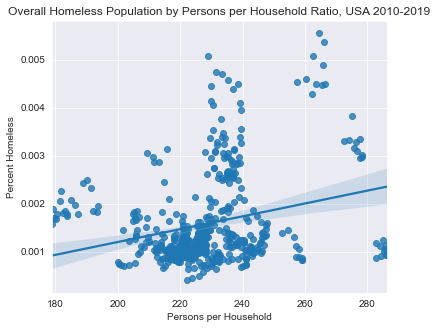

In [46]:
no_dc = nation_df[nation_df['Percent Homeless'] < .009]
f, ax = plt.subplots(figsize=(6,5))
ax.set(title = "Overall Homeless Population by Persons per Household Ratio, USA 2010-2019")
sns.regplot(data=no_dc, x="Persons per Household", y="Percent Homeless");

As we can see, the ratio of Persons per Household most definitely *does* have an affect on the Homeless Population, but given disparity between the scope of this project and all the known factors of homelessness, it would not be wise to say that it's the *primary* contribution factor. More research is needed, especially at the individual care level, to evaluate the effectiveness of public policy and ultimately better combat the crisis.

# References
## Data Courtesies:
MyLA311, US Census, US Department of Housing and Urban Development
## Literature Used:
- Blasi, Gary. 2020-05-28. "UD Day: Impending Evictions and Homelessness in Los Angeles"
- Cusack, Montgomery. 2017. "The Role of Eviction in Veterans' Recisidivsm"
- Sheeley, et al. 2021-01. "The Making of a Crisis: A History of Homelessness in Los Angeles"

In [48]:
!jupyter nbconvert Homelessness.ipynb --to=html --TemplateExporter.exclude_input=True

[NbConvertApp] Converting notebook Homelessness.ipynb to html
[NbConvertApp] Writing 1457928 bytes to Homelessness.html
